# Notities

## Handige links
* [Statline portaal](https://opendata.cbs.nl/statline/portal.html?_la=nl&_catalog=CBS)
* [Snelstartgids open data](https://www.cbs.nl/nl-nl/onze-diensten/open-data/statline-als-open-data/snelstartgids)
* [repo Github voor cbsodata](https://github.com/J535D165/cbsodata)
* [PyPi documentatis cbsodata](https://pypi.org/project/cbsodata/)
* [Sphinx docs cbsodata](https://cbsodata.readthedocs.io/en/latest/index.html)
* [GitHub voorbeelden OData 3](https://github.com/statistiekcbs/CBS-Open-Data-v3)
* [GitHub voorbeelden OData 4](https://github.com/statistiekcbs/CBS-Open-Data-v4/tree/master/Python)
* [Statline voor derden](https://www.cbs.nl/nl-nl/cijfers/statline/statline-voor-derden)
* [CBS open data Statline](https://opendata.cbs.nl/statline/portal.html?_la=nl&_catalog=CBS)
* [PDOK Viewer: Kies bij dataset voor CBS gebiedsindelingen (wijken staan helemaal onderaan) voor kaartweergave](https://www.pdok.nl/viewer/)

# Imports

In [1]:
import pandas as pd
import cbsodata

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import altair as alt
from sklearn import preprocessing


# Settings

In [2]:
GEMEENTES_REGIO_NIJMEGEN = ['Berg en Dal', 'Beuningen', 'Druten', 'Heumen', 'Mook en Middelaar', 'Nijmegen', 'Wijchen']

KEYWORDS = ['wmo', 'gemeente', 'regio', 'postcode', 'zorg', 'werk', 'lonen', 'loon', 'inkomen', 'conjunctuur', 
            'prognose', 'afstand', 'wijk', 'voorziening', 'genees', 'gezond']
URLS = ['opendata.cbs.nl', 'dataderden.cbs.nl']

CBS_OPEN_URL = 'opendata.cbs.nl'
WMO_TABLES = {'2020': '84907NED',
            '2019': '84664NED',
            '2018': '84421NED',
            '2017': '83818NED',
            '2016': '83620NED',
            '2015': '83267NED'}
WIJK_TABLES = {'2020': '84799NED', 
               '2019': '84583NED', 
               '2018': '84286NED', 
               '2017': '83765NED', 
               '2016': '83487NED', 
               '2015': '83220NED'} 
#                '2014': '82931NED'}

DICT_REALTIVELY_COLS = {'aantalinwoners': ['percentagewmoclienten', 'mannen', 'vrouwen', 'k0tot15jaar', 'k15tot25jaar',
                                           'k25tot45jaar', 'k45tot65jaar', 'k65jaarofouder', 'ongehuwd', 'gehuwd', 'gescheiden',
                                           'verweduwd', 'westerstotaal', 'nietwesterstotaal', 'marokko', 
                                           'nederlandseantillenenaruba', 'suriname', 'turkije', 'overignietwesters', 
                                           'geboortetotaal', 'geboorterelatief', 'sterftetotaal', 'sterfterelatief', 
                                           'aantalinkomensontvangers', 'personenpersoortuitkeringbijstand', 
                                           'personenpersoortuitkeringao', 'personenpersoortuitkeringww', 
                                           'personenpersoortuitkeringaow'],
                        'huishoudenstotaal': ['eenpersoonshuishoudens', 'huishoudenszonderkinderen', 'huishoudensmetkinderen'],
                        'bedrijfsvestigingentotaal': ['alandbouwbosbouwenvisserij', 'bfnijverheidenenergie', 
                                                      'gihandelenhoreca', 'hjvervoerinformatieencommunicatie', 
                                                      'klfinancieledienstenonroerendgoed', 'mnzakelijkedienstverlening', 
                                                      'rucultuurrecreatieoverigediensten'],
                        'personenautostotaal': ['personenautosbrandstofbenzine', 'personenautosoverigebrandstof'],
                        'oppervlaktetotaal': ['oppervlakteland', 'oppervlaktewater']}
LIST_NORM_COLS = ['wmoclienten', 'aantalinwoners', 'huishoudenstotaal', 'gemiddeldehuishoudensgrootte', 'bevolkingsdichtheid', 
                  'woningvoorraad', 'gemiddeldewoningwaarde', 'percentageeengezinswoning', 'percentagemeergezinswoning', 
                  'percentagebewoond', 'percentageonbewoond', 'koopwoningen', 'huurwoningentotaal', 'inbezitwoningcorporatie', 
                  'inbezitoverigeverhuurders', 'eigendomonbekend', 'bouwjaarvoor2000', 'bouwjaarvanaf2000', 
                  'gemiddeldelektriciteitsverbruiktotaal', 'gemelectriciteitsverbruikappartement', 
                  'gemelectriciteitsverbruiktussenwoning', 'gemelectriciteitsverbruikhoekwoning', 
                  'gemelectriciteitsverbruiktweeondereenkapwoning', 'gemelectriciteitsverbruikvrijstaandewoning', 
                  'gemelectriciteitsverbruikhuurwoning', 'gemelectriciteitsverbruikeigenwoning', 
                  'gemiddeldaardgasverbruiktotaal', 'gemgasverbruikappartement', 'gemgasverbruiktussenwoning', 
                  'gemgasverbruikhoekwoning', 'gemgasverbruiktweeondereenkapwoning', 'gemgasverbruikvrijstaandewoning', 
                  'gemgasverbruikhuurwoning', 'gemgasverbruikeigenwoning', 'percentagewoningenmetstadsverwarming',
                  'gemiddeldinkomenperinkomensontvanger', 'gemiddeldinkomenperinwoner', 'k40personenmetlaagsteinkomen', 
                  'k20personenmethoogsteinkomen', 'actieven1575jaar', 'k40huishoudensmetlaagsteinkomen', 
                  'k20huishoudensmethoogsteinkomen', 'huishoudensmeteenlaaginkomen', 'huishonderofrondsociaalminimum',
                  'bedrijfsvestigingentotaal', 'personenautostotaal', 'motorfietsen', 'afstandtothuisartsenpraktijk', 
                  'afstandtotgrotesupermarkt', 'afstandtotkinderdagverblijf', 'afstandtotschool', 'scholenbinnen3km',
                  'oppervlaktetotaal', 'matevanstedelijkheid', 'omgevingsadressendichtheid']
DROP_COLS = ['financieringsvorm', 'wmoclientenper1000inwoners', 'gemeentenaam', 'meestvoorkomendepostcode', 'dekkingspercentage', 'totaaldiefstaluitwoningschuured', 
               'vernielingmisdrijftegenopenbareorde', 'geweldsenseksuelemisdrijven', 'personenautosjongerdan6jaar', 
               'personenautos6jaarenouder', 'bedrijfsmotorvoertuigen']

# Functies

In [3]:
def make_cols_relatively(df, dict_relatively_cols):
    for base_col, relatively_cols in dict_relatively_cols.items():
        df[relatively_cols] = df[relatively_cols].div(df[base_col], axis=0)
    return df

def normalize_cols(df, norm_cols):
    df_sub = df.copy()
    df_sub = df_sub[norm_cols]
    x = df_sub.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_sub=pd.DataFrame(x_scaled, columns=df_sub.columns, index=df_sub.index)
    df = df.drop(norm_cols, axis=1).join(df_sub)
    return df

#  Load dataset

In [4]:
df_dataset_WMO = pd.read_parquet('../data/df_dataset_WMO.parquet.gzip')
print(f"Shape of dataset: {df_dataset_WMO.shape}")
df_dataset_WMO.sample(5)

Shape of dataset: (11267, 109)


,,financieringsvorm,wmoclienten,wmoclientenper1000inwoners,gemeentenaam,aantalinwoners,mannen,vrouwen,k0tot15jaar,k15tot25jaar,k25tot45jaar,k45tot65jaar,k65jaarofouder,ongehuwd,gehuwd,gescheiden,verweduwd,westerstotaal,nietwesterstotaal,marokko,nederlandseantillenenaruba,suriname,turkije,overignietwesters,geboortetotaal,geboorterelatief,sterftetotaal,sterfterelatief,huishoudenstotaal,eenpersoonshuishoudens,huishoudenszonderkinderen,huishoudensmetkinderen,gemiddeldehuishoudensgrootte,bevolkingsdichtheid,woningvoorraad,gemiddeldewoningwaarde,percentageeengezinswoning,percentagemeergezinswoning,percentagebewoond,percentageonbewoond,koopwoningen,huurwoningentotaal,inbezitwoningcorporatie,inbezitoverigeverhuurders,eigendomonbekend,bouwjaarvoor2000,bouwjaarvanaf2000,gemiddeldelektriciteitsverbruiktotaal,gemelectriciteitsverbruikappartement,gemelectriciteitsverbruiktussenwoning,gemelectriciteitsverbruikhoekwoning,gemelectriciteitsverbruiktweeondereenkapwoning,gemelectriciteitsverbruikvrijstaandewoning,gemelectriciteitsverbruikhuurwoning,gemelectriciteitsverbruikeigenwoning,gemiddeldaardgasverbruiktotaal,gemgasverbruikappartement,gemgasverbruiktussenwoning,gemgasverbruikhoekwoning,gemgasverbruiktweeondereenkapwoning,gemgasverbruikvrijstaandewoning,gemgasverbruikhuurwoning,gemgasverbruikeigenwoning,percentagewoningenmetstadsverwarming,aantalinkomensontvangers,gemiddeldinkomenperinkomensontvanger,gemiddeldinkomenperinwoner,k40personenmetlaagsteinkomen,k20personenmethoogsteinkomen,actieven1575jaar,k40huishoudensmetlaagsteinkomen,k20huishoudensmethoogsteinkomen,huishoudensmeteenlaaginkomen,huishonderofrondsociaalminimum,personenpersoortuitkeringbijstand,personenpersoortuitkeringao,personenpersoortuitkeringww,personenpersoortuitkeringaow,bedrijfsvestigingentotaal,alandbouwbosbouwenvisserij,bfnijverheidenenergie,gihandelenhoreca,hjvervoerinformatieencommunicatie,klfinancieledienstenonroerendgoed,mnzakelijkedienstverlening,rucultuurrecreatieoverigediensten,personenautostotaal,personenautosbrandstofbenzine,personenautosoverigebrandstof,personenautosperhuishouden,personenautosnaaroppervlakte,motorfietsen,afstandtothuisartsenpraktijk,afstandtotgrotesupermarkt,afstandtotkinderdagverblijf,afstandtotschool,scholenbinnen3km,oppervlaktetotaal,oppervlakteland,oppervlaktewater,meestvoorkomendepostcode,dekkingspercentage,matevanstedelijkheid,omgevingsadressendichtheid,totaaldiefstaluitwoningschuured,vernielingmisdrijftegenopenbareorde,geweldsenseksuelemisdrijven,personenautosjongerdan6jaar,personenautos6jaarenouder,bedrijfsmotorvoertuigen
codering_regio,perioden,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WK009302,2015,Totaal,0.0,NaN,Terschelling,275,140,135,45,30,50,85,55,125,120,15,15,10,0,0,0,0,0,0,0,7,0,7,115,35,35,40,2.4,52.0,118,443.0,83.0,17.0,81.0,19.0,78.0,20.0,0.0,20.0,2.0,91.0,9.0,3760.0,3530.0,NaN,NaN,NaN,4030.0,3150.0,3850.0,2350.0,1980.0,NaN,NaN,NaN,2600.0,2730.0,2440.0,NaN,200.0,30.8,24.7,37.3,21.4,71.5,21.1,35.1,2.7,1.8,0.0,0.0,10.0,60.0,70.0,10.0,5.0,30.0,5.0,5.0,10.0,5.0,170,150,20,1.5,32.0,25,2.0,0.5,1.7,1.7,2.5,533,533,0,.,NaN,5.0,120.0,NaN,NaN,NaN,30.0,140.0,70.0
WK022803,2019,Totaal,900.0,64.0,Ede,14170,6940,7230,2720,1735,3865,3250,2585,6560,5820,1210,570,1300,2680,980,70,105,535,1000,180,13,110,8,6215,2250,1770,2190,2.3,4651.0,6079,189.0,62.0,38.0,98.0,2.0,54.0,45.0,31.0,14.0,1.0,89.0,11.0,2530.0,1950.0,2820.0,3010.0,3100.0,3300.0,2080.0,2900.0,870.0,380.0,1100.0,1310.0,1520.0,1710.0,510.0,1230.0,22.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,510.0,650.0,180.0,2400.0,615.0,5.0,100.0,100.0,80.0,30.0,180.0,120.0,5790,4820,965,0.9,1900.0,450,1.2,1.0,0.4,0.4,17.9,309,305,5,.,NaN,2.0,2359.0,NaN,NaN,NaN,NaN,NaN,NaN
WK075701,2015,Totaal,30.0,25.0,Boxtel,1190,595,590,225,170,210,410,180,535,550,60,50,50,20,5,0,0,0,10,0,1,5,5,420,75,140,210,2.8,109.0,410,354.0,98.0,2.0,97.0,3.0,87.0,12.0,6.0,7.0,0.0,89.0,11.0,4350.0,NaN,3760.0,2950.0,4290.0,4630.0,2920.0,4510.0,1840.0,NaN,124

In [5]:
df_dataset_WMO.shape

(11267, 109)

## Ways to get a subset of the DataFrame:

In [6]:
# Subset on columnvalue:
df_dataset_WMO[df_dataset_WMO['gemeentenaam']=='Nijmegen']

# One row / record
df_dataset_WMO.loc[('WK026801', '2019')]

# Multiple rows / records based on combination of the multiindex
df_dataset_WMO.loc[[('WK026801', '2018'), ('WK026802', '2018')]]

# Multiple rows / records for one column (works only for series)
df_dataset_WMO['gemeentenaam'].loc[(['WK026801', 'WK026802'], ['2018', '2019'])]

# Multiple rows based on both indexes:
df_dataset_WMO.loc(axis=0)[['WK026801', 'WK026802'], ['2018', '2019']]

# Subset with IndexSlice
idx = pd.IndexSlice
# Subset on one of the multiindex and select a column
df_dataset_WMO.loc[idx[:, ['2018', '2019']], idx["gemeentenaam"]]
# Subset on one of the multiindex and select all columns
df_dataset_WMO.loc[idx['WK026801', :], idx[:]]

financieringsvorm  wmoclienten  wmoclientenper1000inwoners gemeentenaam  aantalinwoners  mannen  vrouwen  k0tot15jaar  k15tot25jaar  k25tot45jaar  k45tot65jaar  k65jaarofouder  ongehuwd  gehuwd  gescheiden  verweduwd  westerstotaal  nietwesterstotaal  marokko  nederlandseantillenenaruba  suriname  turkije  overignietwesters  geboortetotaal  geboorterelatief  sterftetotaal  sterfterelatief  huishoudenstotaal  eenpersoonshuishoudens  huishoudenszonderkinderen  huishoudensmetkinderen  gemiddeldehuishoudensgrootte  bevolkingsdichtheid  woningvoorraad  gemiddeldewoningwaarde  percentageeengezinswoning  percentagemeergezinswoning  percentagebewoond  percentageonbewoond  koopwoningen  huurwoningentotaal  inbezitwoningcorporatie  inbezitoverigeverhuurders  eigendomonbekend  bouwjaarvoor2000  bouwjaarvanaf2000  gemiddeldelektriciteitsverbruiktotaal  gemelectriciteitsverbruikappartement  gemelectriciteitsverbruiktussenwoning  gemelectriciteitsverbruikhoekwoning  \
codering_regio perioden                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
WK026801       2019                Totaal        610.0                        51.0     Nijmegen           11850    5865     5985          320          3915          4610          1850            1165      9510    1305         790        240           1755               1075       90                         110        75      125                685              50                 4             40                3               9020                    6915                       1650                     450                           1.3               9523.0            5480                   222.0                       12.0                        88.0               94.0                  6.0          23.0                76.0                     31.0                       45.0               1.0              84.0               16.0                                 2070.0                                1950.0                                 2860.0                               2810.0   
               2018                Totaal        585.0                        49.0     Nijmegen           12055    5925     6130          440          4090          4510          1895            1135      9640    1370         800        235           1670               1245      100                         110        75      125                845              40                 3             40                3               9060                    6980                       1620                     450                           1.3               9685.0            5427                   198.0                       12.0                        88.0               93.0                  7.0          22.0                76.0                     32.0                       43.0               2.0              84.0               16.0                                 2110.0                                2000.0                                 2840.0                               2910.0   
               2017                Totaal        550

## Transform data

In [7]:
df = df_dataset_WMO.copy()
df['percentagewmoclienten'] = df['wmoclienten']
df = df.drop(DROP_COLS, axis=1)
df = make_cols_relatively(df=df, dict_relatively_cols=DICT_REALTIVELY_COLS)
df = normalize_cols(df=df, norm_cols=LIST_NORM_COLS)

In [8]:
df.shape

(11267, 99)

In [10]:
df.sample(5)

,,mannen,vrouwen,k0tot15jaar,k15tot25jaar,k25tot45jaar,k45tot65jaar,k65jaarofouder,ongehuwd,gehuwd,gescheiden,verweduwd,westerstotaal,nietwesterstotaal,marokko,nederlandseantillenenaruba,suriname,turkije,overignietwesters,geboortetotaal,geboorterelatief,sterftetotaal,sterfterelatief,eenpersoonshuishoudens,huishoudenszonderkinderen,huishoudensmetkinderen,aantalinkomensontvangers,personenpersoortuitkeringbijstand,personenpersoortuitkeringao,personenpersoortuitkeringww,personenpersoortuitkeringaow,alandbouwbosbouwenvisserij,bfnijverheidenenergie,gihandelenhoreca,hjvervoerinformatieencommunicatie,klfinancieledienstenonroerendgoed,mnzakelijkedienstverlening,rucultuurrecreatieoverigediensten,personenautosbrandstofbenzine,personenautosoverigebrandstof,personenautosperhuishouden,personenautosnaaroppervlakte,oppervlakteland,oppervlaktewater,percentagewmoclienten,wmoclienten,aantalinwoners,huishoudenstotaal,gemiddeldehuishoudensgrootte,bevolkingsdichtheid,woningvoorraad,gemiddeldewoningwaarde,percentageeengezinswoning,percentagemeergezinswoning,percentagebewoond,percentageonbewoond,koopwoningen,huurwoningentotaal,inbezitwoningcorporatie,inbezitoverigeverhuurders,eigendomonbekend,bouwjaarvoor2000,bouwjaarvanaf2000,gemiddeldelektriciteitsverbruiktotaal,gemelectriciteitsverbruikappartement,gemelectriciteitsverbruiktussenwoning,gemelectriciteitsverbruikhoekwoning,gemelectriciteitsverbruiktweeondereenkapwoning,gemelectriciteitsverbruikvrijstaandewoning,gemelectriciteitsverbruikhuurwoning,gemelectriciteitsverbruikeigenwoning,gemiddeldaardgasverbruiktotaal,gemgasverbruikappartement,gemgasverbruiktussenwoning,gemgasverbruikhoekwoning,gemgasverbruiktweeondereenkapwoning,gemgasverbruikvrijstaandewoning,gemgasverbruikhuurwoning,gemgasverbruikeigenwoning,percentagewoningenmetstadsverwarming,gemiddeldinkomenperinkomensontvanger,gemiddeldinkomenperinwoner,k40personenmetlaagsteinkomen,k20personenmethoogsteinkomen,actieven1575jaar,k40huishoudensmetlaagsteinkomen,k20huishoudensmethoogsteinkomen,huishoudensmeteenlaaginkomen,huishonderofrondsociaalminimum,bedrijfsvestigingentotaal,personenautostotaal,motorfietsen,afstandtothuisartsenpraktijk,afstandtotgrotesupermarkt,afstandtotkinderdagverblijf,afstandtotschool,scholenbinnen3km,oppervlaktetotaal,matevanstedelijkheid,omgevingsadressendichtheid
codering_regio,perioden,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WK087904,2015,0.514090,0.485910,0.143945,0.124143,0.199543,0.338919,0.193450,0.438690,0.454684,0.051790,0.055598,0.111196,0.020564,0.000000,0.001523,0.000762,0.001523,0.014471,0.007616,0.001066,0.009139,0.001219,0.304029,0.338828,0.360806,0.776847,0.010663,0.050267,0.022848,0.190404,0.195122,0.195122,0.195122,0.048780,0.081301,0.186992,0.105691,0.852224,0.147776,1.3,99.0,0.994344,0.005656,0.067784,0.049804,0.060086,0.059258,0.419355,0.006564,0.056705,0.210526,0.88,0.12,0.928571,0.071429,0.76,0.23,0.15,0.09,0.000000,0.89,0.11,0.458515,0.339744,0.430380,0.434685,0.379195,0.401709,0.338920,0.407194,0.358763,0.297386,0.416667,0.452599,0.393939,0.327485,0.280255,0.390295,NaN,0.178607,0.190332,0.320988,0.350090,0.630042,0.294055,0.363990,0.070155,0.059269,0.065252,0.049129,0.068493,0.111111,0.094828,0.053097,0.13,0.014803,0.139887,1.0,0.036706
WK166902,2018,0.504478,0.495522,0.111940,0.091045,0.168657,0.322388,0.302985,0.364179,0.479104,0.074627,0.080597,0.129851,0.041791,0.004478,0.001493,0.001493,0.001493,0.035821,0.005970,0.001791,0.014925,0.004478,0.345161,0.364516,0.293548,0.805970,0.011940,0.044776,0.011940,0.283582,0.142857,0.095238,0.166667,0.071429,0.095238,0.285714,0.142857,0.852243,0.145119,1.2,96.0,0.991427,0.008573,0.035821,0.013430,0.030661,0.033644,0.354839,0.005964,0.034097,0.135114,0.88,0.12,0.959184,0.040816,0.74,0.22,0.17,0.05,0.088889,0.89,0.11,0.356623,0.334936,0.339662,0.342342,0.261745,0.304843,0.283054,0.315108,0.336082,0.271242,0.461538,0.461774,0.354312,0.314327,0.254777,0.375527,NaN,0.185671,0.212991,0.316872,0.308797,0.55771

In [12]:
print(list(df.columns))

['mannen', 'vrouwen', 'k0tot15jaar', 'k15tot25jaar', 'k25tot45jaar', 'k45tot65jaar', 'k65jaarofouder', 'ongehuwd', 'gehuwd', 'gescheiden', 'verweduwd', 'westerstotaal', 'nietwesterstotaal', 'marokko', 'nederlandseantillenenaruba', 'suriname', 'turkije', 'overignietwesters', 'geboortetotaal', 'geboorterelatief', 'sterftetotaal', 'sterfterelatief', 'eenpersoonshuishoudens', 'huishoudenszonderkinderen', 'huishoudensmetkinderen', 'aantalinkomensontvangers', 'personenpersoortuitkeringbijstand', 'personenpersoortuitkeringao', 'personenpersoortuitkeringww', 'personenpersoortuitkeringaow', 'alandbouwbosbouwenvisserij', 'bfnijverheidenenergie', 'gihandelenhoreca', 'hjvervoerinformatieencommunicatie', 'klfinancieledienstenonroerendgoed', 'mnzakelijkedienstverlening', 'rucultuurrecreatieoverigediensten', 'personenautosbrandstofbenzine', 'personenautosoverigebrandstof', 'personenautosperhuishouden', 'personenautosnaaroppervlakte', 'oppervlakteland', 'oppervlaktewater', 'percentagewmoclienten', 'wm

# EDA data

In [13]:
df_plot = df[['percentagewmoclienten', 'k0tot15jaar', 'k15tot25jaar', 'k25tot45jaar', 'k45tot65jaar', 'k65jaarofouder']].copy()

In [14]:
df_plot.head()

,,percentagewmoclienten,k0tot15jaar,k15tot25jaar,k25tot45jaar,k45tot65jaar,k65jaarofouder
codering_regio,perioden,,,,,,
WK168000,2019,0.059805,0.158554,0.095967,0.173853,0.319889,0.250348
WK168001,2019,0.038732,0.140845,0.105634,0.193662,0.345070,0.211268
WK168002,2019,0.032258,0.107527,0.107527,0.129032,0.387097,0.247312
WK168003,2019,0.036585,0.073171,0.121951,0.121951,0.378049,0.280488
WK168004,2019,0.078431,0.078431,0.137255,0.078431,0.431373,0.235294


In [17]:
df_plot_tidy = pd.DataFrame()
for i in ['k0tot15jaar', 'k15tot25jaar', 'k25tot45jaar', 'k45tot65jaar', 'k65jaarofouder']:
    df_sub = df_plot[['percentagewmoclienten', i]].copy()
    df_sub['value'] = df[i]
    df_sub['category'] = i
    df_sub = df_sub.drop(i, axis=1)
    df_plot_tidy = pd.concat([df_plot_tidy, df_sub])

In [18]:
df_plot_tidy

,,percentagewmoclienten,value,category
codering_regio,perioden,,,
WK168000,2019,0.059805,0.158554,k0tot15jaar
WK168001,2019,0.038732,0.140845,k0tot15jaar
WK168002,2019,0.032258,0.107527,k0tot15jaar
WK168003,2019,0.036585,0.073171,k0tot15jaar
WK168004,2019,0.078431,0.078431,k0tot15jaar
...,...,...,...,...
WK191608,2015,0.051121,0.309417,k65jaarofouder
WK191609,2015,0.037219,0.253160,k65jaarofouder
WK191610,2015,0.042569,0.165945,k65jaarofouder


k0tot15jaar


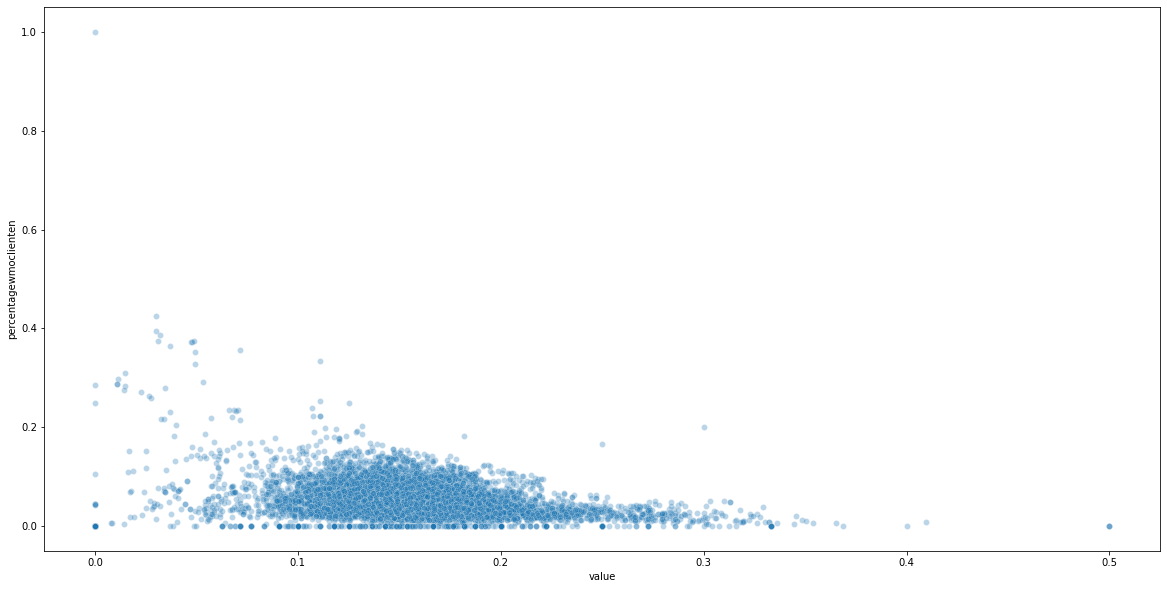

k15tot25jaar


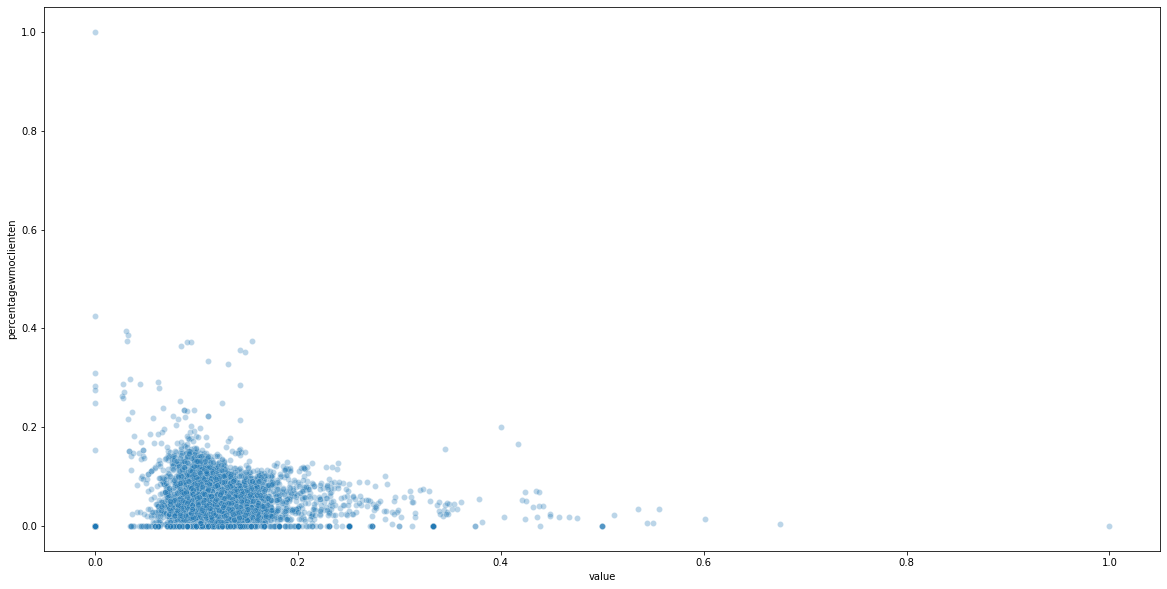

k25tot45jaar


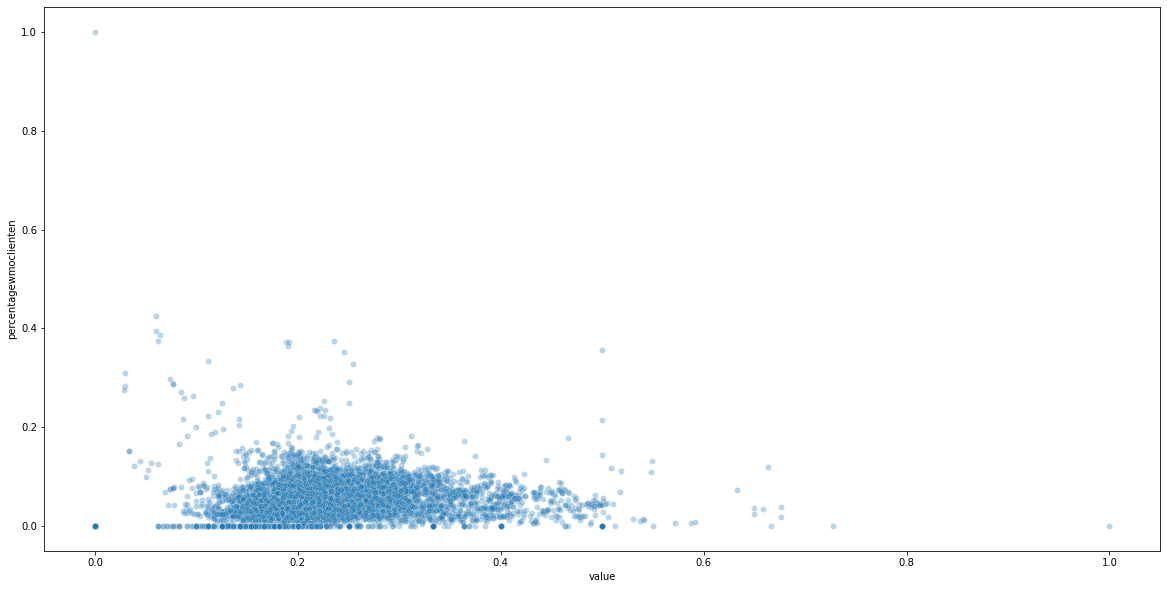

k45tot65jaar


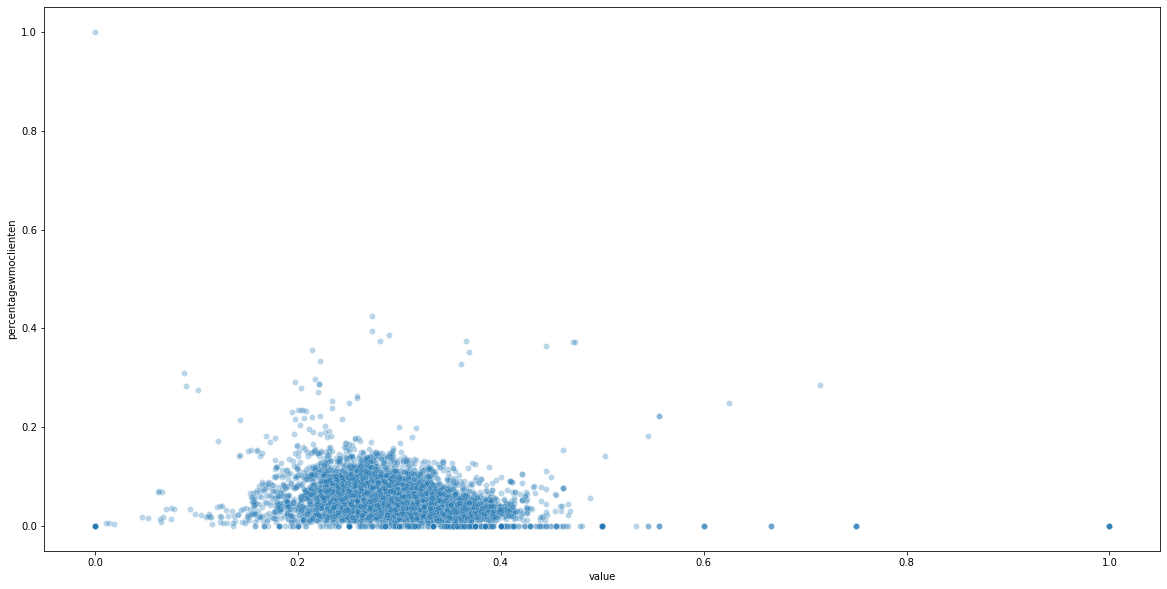

k65jaarofouder


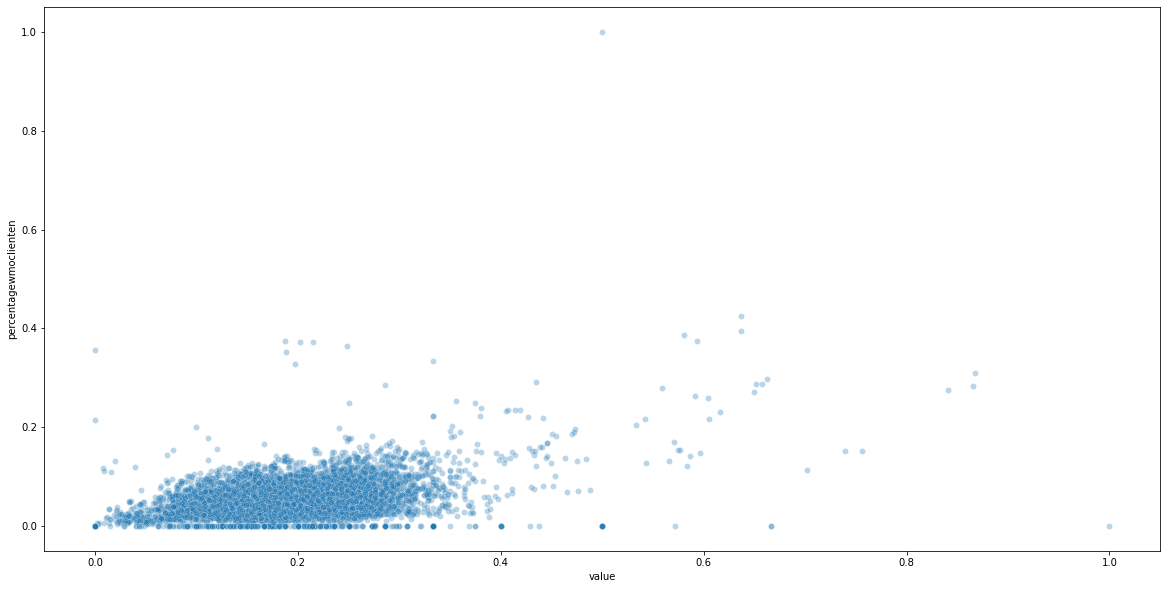

In [30]:

for i in ['k0tot15jaar', 'k15tot25jaar', 'k25tot45jaar', 'k45tot65jaar', 'k65jaarofouder']:
    fig, ax = plt.subplots(figsize=(20,10))
    df_seaborn = df_plot_tidy[df_plot_tidy['category']==i]
    print(i)
    sns.scatterplot(data=df_seaborn, x="value", y="percentagewmoclienten", alpha=0.3)
    plt.show()

In [9]:
df_dataset_WMO.head()

,,financieringsvorm,wmoclienten,wmoclientenper1000inwoners,gemeentenaam,aantalinwoners,mannen,vrouwen,k0tot15jaar,k15tot25jaar,k25tot45jaar,k45tot65jaar,k65jaarofouder,ongehuwd,gehuwd,gescheiden,verweduwd,westerstotaal,nietwesterstotaal,marokko,nederlandseantillenenaruba,suriname,turkije,overignietwesters,geboortetotaal,geboorterelatief,sterftetotaal,sterfterelatief,huishoudenstotaal,eenpersoonshuishoudens,huishoudenszonderkinderen,huishoudensmetkinderen,gemiddeldehuishoudensgrootte,bevolkingsdichtheid,woningvoorraad,gemiddeldewoningwaarde,percentageeengezinswoning,percentagemeergezinswoning,percentagebewoond,percentageonbewoond,koopwoningen,huurwoningentotaal,inbezitwoningcorporatie,inbezitoverigeverhuurders,eigendomonbekend,bouwjaarvoor2000,bouwjaarvanaf2000,gemiddeldelektriciteitsverbruiktotaal,gemelectriciteitsverbruikappartement,gemelectriciteitsverbruiktussenwoning,gemelectriciteitsverbruikhoekwoning,gemelectriciteitsverbruiktweeondereenkapwoning,gemelectriciteitsverbruikvrijstaandewoning,gemelectriciteitsverbruikhuurwoning,gemelectriciteitsverbruikeigenwoning,gemiddeldaardgasverbruiktotaal,gemgasverbruikappartement,gemgasverbruiktussenwoning,gemgasverbruikhoekwoning,gemgasverbruiktweeondereenkapwoning,gemgasverbruikvrijstaandewoning,gemgasverbruikhuurwoning,gemgasverbruikeigenwoning,percentagewoningenmetstadsverwarming,aantalinkomensontvangers,gemiddeldinkomenperinkomensontvanger,gemiddeldinkomenperinwoner,k40personenmetlaagsteinkomen,k20personenmethoogsteinkomen,actieven1575jaar,k40huishoudensmetlaagsteinkomen,k20huishoudensmethoogsteinkomen,huishoudensmeteenlaaginkomen,huishonderofrondsociaalminimum,personenpersoortuitkeringbijstand,personenpersoortuitkeringao,personenpersoortuitkeringww,personenpersoortuitkeringaow,bedrijfsvestigingentotaal,alandbouwbosbouwenvisserij,bfnijverheidenenergie,gihandelenhoreca,hjvervoerinformatieencommunicatie,klfinancieledienstenonroerendgoed,mnzakelijkedienstverlening,rucultuurrecreatieoverigediensten,personenautostotaal,personenautosbrandstofbenzine,personenautosoverigebrandstof,personenautosperhuishouden,personenautosnaaroppervlakte,motorfietsen,afstandtothuisartsenpraktijk,afstandtotgrotesupermarkt,afstandtotkinderdagverblijf,afstandtotschool,scholenbinnen3km,oppervlaktetotaal,oppervlakteland,oppervlaktewater,meestvoorkomendepostcode,dekkingspercentage,matevanstedelijkheid,omgevingsadressendichtheid,totaaldiefstaluitwoningschuured,vernielingmisdrijftegenopenbareorde,geweldsenseksuelemisdrijven,personenautosjongerdan6jaar,personenautos6jaarenouder,bedrijfsmotorvoertuigen
codering_regio,perioden,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WK168000,2019,Totaal,215.0,60.0,Aa en Hunze,3595,1755,1845,570,345,625,1150,900,1475,1645,235,230,130,75,0,5,5,0,70,20,5,30,9,1555,430,585,540,2.3,245.0,1615,248.0,91.0,9.0,96.0,4.0,74.0,26.0,20.0,6.0,0.0,88.0,12.0,2980.0,1650.0,2310.0,2700.0,3090.0,3560.0,2150.0,3360.0,1620.0,790.0,1300.0,1450.0,1550.0,2020.0,1300.0,1780.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,100.0,60.0,830.0,290.0,20.0,45.0,65.0,10.0,30.0,80.0,40.0,1995,1570,425,1.3,136.0,190,0.9,0.9,0.5,0.8,2.6,1478,1466,13,.,NaN,5.0,393.0,NaN,NaN,NaN,NaN,NaN,NaN
WK168001,2019,Totaal,55.0,39.0,Aa en Hunze,1420,725,700,200,150,275,490,300,605,645,95,70,55,20,0,0,5,0,15,10,7,10,8,625,185,240,205,2.3,80.0,584,251.0,97.0,3.0,96.0,4.0,83.0,17.0,13.0,4.0,0.0,95.0,5.0,3100.0,1960.0,1890.0,2350.0,2940.0,3440.0,1950.0,3380.0,1790.0,1250.0,1190.0,1280.0,1520.0,2080.0,1420.0,1880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,50.0,20.0,280.0,135.0,20.0,30.0,25.0,10.0,15.0,20.0,20.0,875,660,215,1.4,49.0,110,3.8,0.9,1.3,1.0,1.0,1789,1782,7,.,NaN,5.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN
WK168002,2019,Totaal,15.0,32.0,Aa en Hunze,465,245,220,50,50,60,180,115,170,220,45,20,15,20,10,0,0,0,10,0,2,5,15,220,75,85,65,2.1,57.0,169,297.0,98.0,2.0,95.0,5.0,81.0,18.0,13.0,5.0,1.0,86.0,14.0,3230.0,NaN,NaN,NaN,2400.0,3600.0,2000.0,3500.0,1960.0,NaN,NaN

<AxesSubplot:xlabel='codering_regio,perioden'>

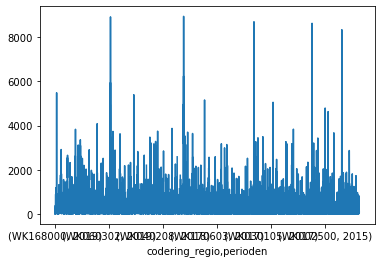

In [10]:
df_dataset_WMO['wmoclienten'].plot()

<AxesSubplot:xlabel='codering_regio,perioden'>

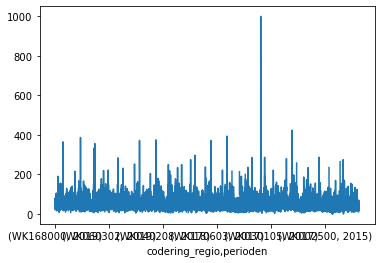

In [11]:
df_dataset_WMO['wmoclientenper1000inwoners'].plot()

In [12]:
df_dataset_WMO[df_dataset_WMO['wmoclientenper1000inwoners']==1000]

,,financieringsvorm,wmoclienten,wmoclientenper1000inwoners,gemeentenaam,aantalinwoners,mannen,vrouwen,k0tot15jaar,k15tot25jaar,k25tot45jaar,k45tot65jaar,k65jaarofouder,ongehuwd,gehuwd,gescheiden,verweduwd,westerstotaal,nietwesterstotaal,marokko,nederlandseantillenenaruba,suriname,turkije,overignietwesters,geboortetotaal,geboorterelatief,sterftetotaal,sterfterelatief,huishoudenstotaal,eenpersoonshuishoudens,huishoudenszonderkinderen,huishoudensmetkinderen,gemiddeldehuishoudensgrootte,bevolkingsdichtheid,woningvoorraad,gemiddeldewoningwaarde,percentageeengezinswoning,percentagemeergezinswoning,percentagebewoond,percentageonbewoond,koopwoningen,huurwoningentotaal,inbezitwoningcorporatie,inbezitoverigeverhuurders,eigendomonbekend,bouwjaarvoor2000,bouwjaarvanaf2000,gemiddeldelektriciteitsverbruiktotaal,gemelectriciteitsverbruikappartement,gemelectriciteitsverbruiktussenwoning,gemelectriciteitsverbruikhoekwoning,gemelectriciteitsverbruiktweeondereenkapwoning,gemelectriciteitsverbruikvrijstaandewoning,gemelectriciteitsverbruikhuurwoning,gemelectriciteitsverbruikeigenwoning,gemiddeldaardgasverbruiktotaal,gemgasverbruikappartement,gemgasverbruiktussenwoning,gemgasverbruikhoekwoning,gemgasverbruiktweeondereenkapwoning,gemgasverbruikvrijstaandewoning,gemgasverbruikhuurwoning,gemgasverbruikeigenwoning,percentagewoningenmetstadsverwarming,aantalinkomensontvangers,gemiddeldinkomenperinkomensontvanger,gemiddeldinkomenperinwoner,k40personenmetlaagsteinkomen,k20personenmethoogsteinkomen,actieven1575jaar,k40huishoudensmetlaagsteinkomen,k20huishoudensmethoogsteinkomen,huishoudensmeteenlaaginkomen,huishonderofrondsociaalminimum,personenpersoortuitkeringbijstand,personenpersoortuitkeringao,personenpersoortuitkeringww,personenpersoortuitkeringaow,bedrijfsvestigingentotaal,alandbouwbosbouwenvisserij,bfnijverheidenenergie,gihandelenhoreca,hjvervoerinformatieencommunicatie,klfinancieledienstenonroerendgoed,mnzakelijkedienstverlening,rucultuurrecreatieoverigediensten,personenautostotaal,personenautosbrandstofbenzine,personenautosoverigebrandstof,personenautosperhuishouden,personenautosnaaroppervlakte,motorfietsen,afstandtothuisartsenpraktijk,afstandtotgrotesupermarkt,afstandtotkinderdagverblijf,afstandtotschool,scholenbinnen3km,oppervlaktetotaal,oppervlakteland,oppervlaktewater,meestvoorkomendepostcode,dekkingspercentage,matevanstedelijkheid,omgevingsadressendichtheid,totaaldiefstaluitwoningschuured,vernielingmisdrijftegenopenbareorde,geweldsenseksuelemisdrijven,personenautosjongerdan6jaar,personenautos6jaarenouder,bedrijfsmotorvoertuigen
codering_regio,perioden,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WK085541,2017,Totaal,10.0,1000.0,Tilburg,10,5,5,0,0,0,0,5,5,10,0,0,5,0,0,0,0,0,0,0,0,0,0,5,0,5,0,2.0,8.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10,5,0,NaN,NaN,0,1.5,1.5,1.5,1.5,7.7,146,146,0,.,NaN,5.0,298.0,NaN,NaN,NaN,5.0,5.0,NaN


In [13]:
df_corr_with_na = df.copy().corr()

In [14]:
df_corr = df_corr_with_na.dropna(axis=1, how='all').dropna(axis=0, how='all')

In [15]:
df_corr = df_corr.fillna(0)

In [16]:
df_corr.shape

(99, 99)

In [17]:
df_corr

,mannen,vrouwen,k0tot15jaar,k15tot25jaar,k25tot45jaar,k45tot65jaar,k65jaarofouder,ongehuwd,gehuwd,gescheiden,verweduwd,westerstotaal,nietwesterstotaal,marokko,nederlandseantillenenaruba,suriname,turkije,overignietwesters,geboortetotaal,geboorterelatief,sterftetotaal,sterfterelatief,eenpersoonshuishoudens,huishoudenszonderkinderen,huishoudensmetkinderen,aantalinkomensontvangers,personenpersoortuitkeringbijstand,personenpersoortuitkeringao,personenpersoortuitkeringww,personenpersoortuitkeringaow,alandbouwbosbouwenvisserij,bfnijverheidenenergie,gihandelenhoreca,hjvervoerinformatieencommunicatie,klfinancieledienstenonroerendgoed,mnzakelijkedienstverlening,rucultuurrecreatieoverigediensten,personenautosbrandstofbenzine,personenautosoverigebrandstof,personenautosperhuishouden,personenautosnaaroppervlakte,oppervlakteland,oppervlaktewater,percentagewmoclienten,wmoclienten,aantalinwoners,huishoudenstotaal,gemiddeldehuishoudensgrootte,bevolkingsdichtheid,woningvoorraad,gemiddeldewoningwaarde,percentageeengezinswoning,percentagemeergezinswoning,percentagebewoond,percentageonbewoond,koopwoningen,huurwoningentotaal,inbezitwoningcorporatie,inbezitoverigeverhuurders,eigendomonbekend,bouwjaarvoor2000,bouwjaarvanaf2000,gemiddeldelektriciteitsverbruiktotaal,gemelectriciteitsverbruikappartement,gemelectriciteitsverbruiktussenwoning,gemelectriciteitsverbruikhoekwoning,gemelectriciteitsverbruiktweeondereenkapwoning,gemelectriciteitsverbruikvrijstaandewoning,gemelectriciteitsverbruikhuurwoning,gemelectriciteitsverbruikeigenwoning,gemiddeldaardgasverbruiktotaal,gemgasverbruikappartement,gemgasverbruiktussenwoning,gemgasverbruikhoekwoning,gemgasverbruiktweeondereenkapwoning,gemgasverbruikvrijstaandewoning,gemgasverbruikhuurwoning,gemgasverbruikeigenwoning,percentagewoningenmetstadsverwarming,gemiddeldinkomenperinkomensontvanger,gemiddeldinkomenperinwoner,k40personenmetlaagsteinkomen,k20personenmethoogsteinkomen,actieven1575jaar,k40huishoudensmetlaagsteinkomen,k20huishoudensmethoogsteinkomen,huishoudensmeteenlaaginkomen,huishonderofrondsociaalminimum,bedrijfsvestigingentotaal,personenautostotaal,motorfietsen,afstandtothuisartsenpraktijk,afstandtotgrotesupermarkt,afstandtotkinderdagverblijf,afstandtotschool,scholenbinnen3km,oppervlaktetotaal,matevanstedelijkheid,omgevingsadressendichtheid
mannen,1.000000,-0.571685,-0.076375,0.203643,0.079726,0.191503,-0.216992,0.175700,0.015123,-0.038620,-0.241843,-0.041066,-0.066072,-0.067428,-0.007193,-0.031641,-0.031652,-0.067189,-0.134478,-0.035296,-0.282021,-0.142718,-0.090074,0.028186,0.023463,0.004921,-0.170007,0.055863,-0.147206,-0.332435,0.289994,0.103544,0.007368,-0.106751,-0.128798,-0.264150,-0.223799,-0.354942,0.366861,0.368168,-0.332901,-0.063553,0.063409,-0.240071,-0.195653,-0.191636,-0.190086,0.121222,-0.221106,-0.198922,0.067925,0.265723,-0.265678,-0.228192,0.228257,0.268055,-0.274439,-0.398674,0.148931,0.038503,-0.051506,0.051700,0.337784,0.138132,-0.070050,-0.111452,-0.067752,-0.060172,0.315577,0.272601,0.271337,0.056380,-0.070635,-0.163350,-0.152173,-0.176985,0.295141,0.251547,0.094967,-0.098066,-0.091353,0.084529,-0.057099,0.266736,-0.159760,0.137876,0.012513,-0.032889,-0.122002,-0.179958,-0.177221,0.307097,0.306647,0.254917,0.281503,-0.196322,0.054199,0.267487,-0.181391
vrouwen,-0.571685,1.000000,0.135158,-0.166013,-0.038769,-0.235151,0.214926,-0.173123,-0.048170,-0.051372,0.240926,0.054894,0.083455,0.081127,0.026389,0.044106,0.027978,0.091918,0.187406,-0.139670,0.305715,-0.183036,-0.020463,-0.113899,-0.085240,0.233402,0.176843,-0.052336,0.165562,0.328054,-0.243361,-0.122201,-0.050202,0.017146,0.115556,0.263659,0.277754,0.392240,-0.400413,-0.375231,0.333399,0.095728,-0.095371,0.280860,0.213172,0.213796,0.210768,-0.093837,0.222646,0.220041,-0.083117,-0.256218,0.256145,0.286495,-0.286688,-0.252529,0.260130,0.411472,-0.192795,-0.051262,0.051572,-0.051794,-0.377808,-0.145257,0.058353,0.096226,0.043193,0.025492,-0.334918,-0.315391,-0.287018,-0.062277,0.071181,0.159974,0.135188,0.171756,-0.308775,-0.2682

In [18]:
# https://towardsdatascience.com/altair-plot-deconstruction-visualizing-the-correlation-structure-of-weather-data-38fb5668c5b1
cor_data = df_corr.stack().reset_index().rename(columns={0: 'correlation', 'level_0': 'variable', 'level_1': 'variable2'})
cor_data['correlation_label'] = cor_data['correlation'].map('{:.2f}'.format)
cor_data.head()

,variable,variable2,correlation,correlation_label
0,mannen,mannen,1.000000,1.00
1,mannen,vrouwen,-0.571685,-0.57
2,mannen,k0tot15jaar,-0.076375,-0.08
3,mannen,k15tot25jaar,0.203643,0.20
4,mannen,k25tot45jaar,0.079726,0.08


In [19]:
cor_data.shape

(9801, 4)

In [20]:
cor_data[cor_data['variable']=='percentagewmoclienten']

,variable,variable2,correlation,correlation_label
4257,percentagewmoclienten,mannen,-0.240071,-0.24
4258,percentagewmoclienten,vrouwen,0.280860,0.28
4259,percentagewmoclienten,k0tot15jaar,-0.271281,-0.27
4260,percentagewmoclienten,k15tot25jaar,-0.150094,-0.15
4261,percentagewmoclienten,k25tot45jaar,0.077771,0.08
4262,percentagewmoclienten,k45tot65jaar,-0.290118,-0.29
4263,percentagewmoclienten,k65jaarofouder,0.389062,0.39
4264,percentagewmoclienten,ongehuwd,0.009140,0.01
4265,percentagewmoclienten,gehuwd,-0.299651,-0.30
4266,percentagewmoclienten,gescheiden,0.355592,0.36


In [21]:
cor_data_sub = cor_data[(cor_data['correlation']<-0.7)|(cor_data['correlation']>0.7)]
cor_data_sub.shape

(389, 4)

In [22]:
base = alt.Chart(cor_data_sub).encode(
    x='variable2:O',
    y='variable:O'    
)

# Text layer with correlation labels
# Colors are for easier readability
text = base.mark_text().encode(
    text='correlation_label',
    color=alt.condition(
        alt.datum.correlation > 0.5, 
        alt.value('white'),
        alt.value('black')
    )
)

# The correlation heatmap itself
cor_plot = base.mark_rect().encode(
    color='correlation:Q'
)

cor_plot + text # The '+' means overlaying the text and rect layer

alt.LayerChart(...)

In [ ]:
df_dataset_WMO.head()

In [ ]:
# source = df_dataset_WMO[['wmoclienten', 'wmoclientenper1000inwoners', 'AantalInwoners_5']].copy().loc(axis=0)[:, ['2019']].reset_index()
# source = source.fillna(-5)
# # source[['wmoclienten', 'wmoclientenper1000inwoners', 'AantalInwoners_5']]

In [ ]:
# source
jaar = '2019'
source = df_dataset_WMO.copy().loc(axis=0)[:, [jaar]].reset_index()
source

In [ ]:
jaar = '2019'
source = df_dataset_WMO.copy().loc(axis=0)[:, [jaar]].reset_index()
alt.Chart(source, title=f"WMO clienten vs WMO clienten per 1000 inwoners voor jaar {jaar}",).mark_circle(size=60).encode(
    x='wmoclienten',
    y='wmoclientenper1000inwoners',
    color='AantalInwoners_5',
    tooltip=['codering_regio', 'perioden', 'gemeentenaam', 'AantalInwoners_5', 'wmoclienten', 'wmoclientenper1000inwoners']
).interactive()

In [ ]:
jaar = '2018'
source = df_dataset_WMO.copy().loc(axis=0)[:, [jaar]].reset_index()
alt.Chart(source, title=f"WMO clienten vs WMO clienten per 1000 inwoners voor jaar {jaar}",).mark_circle(size=60).encode(
    x='wmoclienten',
    y='wmoclientenper1000inwoners',
    color='AantalInwoners_5',
    tooltip=['codering_regio', 'perioden', 'gemeentenaam', 'AantalInwoners_5', 'wmoclienten', 'wmoclientenper1000inwoners']
).interactive()

In [ ]:
jaar = '2017'
source = df_dataset_WMO.copy().loc(axis=0)[:, [jaar]].reset_index()
alt.Chart(source, title=f"WMO clienten vs WMO clienten per 1000 inwoners voor jaar {jaar}",).mark_circle(size=60).encode(
    x='wmoclienten',
    y='wmoclientenper1000inwoners',
    color='AantalInwoners_5',
    tooltip=['codering_regio', 'perioden', 'gemeentenaam', 'AantalInwoners_5', 'wmoclienten', 'wmoclientenper1000inwoners']
).interactive()

In [ ]:
jaar = '2016'
source = df_dataset_WMO.copy().loc(axis=0)[:, [jaar]].reset_index()
alt.Chart(source, title=f"WMO clienten vs WMO clienten per 1000 inwoners voor jaar {jaar}",).mark_circle(size=60).encode(
    x='wmoclienten',
    y='wmoclientenper1000inwoners',
    color='AantalInwoners_5',
    tooltip=['codering_regio', 'perioden', 'gemeentenaam', 'AantalInwoners_5', 'wmoclienten', 'wmoclientenper1000inwoners']
).interactive()

In [ ]:
# for jaar in ['2016', '2017', '2018', '2019']:
#     source = df_dataset_WMO.copy().loc(axis=0)[:, [jaar]].reset_index()
#     alt.Chart(source, title=f"WMO clienten vs WMO clienten per 1000 inwoners voor jaar {jaar}",).mark_circle(size=60).encode(
#         x='wmoclienten',
#         y='wmoclientenper1000inwoners',
#         color='AantalInwoners_5',
#         tooltip=['AantalInwoners_5', 'wmoclienten', 'wmoclientenper1000inwoners']
#     ).interactive()

# Klad

In [ ]:
# # DRAAIT LANG ALS JE ALLES OPVRAAGT
# url = 'dataderden.cbs.nl'
# df_to_collect = df_tables_cbs_derden
# dict_cbs_tables = {}
# for i in df_to_collect['Identifier'][:2]:
#     print(i)
#     try:
#         df = pd.DataFrame(cbsodata.get_data(str(i), catalog_url=url))
#     except Exception:
#         df = pd.DataFrame()
#         pass
#     dict_cbs_tables[i] = df
# dict_cbs_tables['40072NED'].sample(10)

In [ ]:
# # Eerste lijst met mogelijke tabellen
# dict_tables = {'regio-indeling 2021': '84929NED',
#                'regio-indeling 2020':'84721NED', 
#                'regio-indeling 2019':'84378NED', 
#                'regio-indeling 2018':'83859NED', 
#                'regio-indeling 2017':'83553NED', 
#                'regio-indeling 2016':'83287NED',
#                 'Bevolking; geslacht, leeftijd, regio': '37259ned',
#                 'Huishoudens; samenstelling, regio': '71486ned',
#                 'Personen; afstand tot ouder, 2014': '83246NED',
#                 'Bevolking; nationaliteit en regio' : '84727NED',
#                 'Bevolking; leeftijd, regio, 2020-2050': '84525NED',
#                 'Bevolkingsontwikkeling, regio, 2020-2050': '84528NED',
#                 'doodsoorzaken':'80202ned',
#                 'Geneesmiddelen; regio (gemeente)': '83251NED',
#                 'DBC-GGZ; personen per diagnose; regio': '84859NED',
#                 'Indicatoren jeugdzorg; gemeenten': '82972NED',
#                 'Jeugdzorgcombinaties': '84136NED',
#                 'Jongeren met jeugdzorg; pers. kenmerken':'84135NED',
#                 'Trajecten jeugdzorg; regio, peildatum': '82968NED',
#                 'Gemeentelijke kosten; jeugdzorg, regio': '83454NED',
#                 'Wmo-cliënten; financiering, wijken, 2020': '84907NED',
#                 'Wmo-cliënten; financiering, wijken, 2019': '84664NED',
#                 'Wmo-cliënten; financiering, wijken, 2018': '84421NED',
#                 'Wmo-cliënten; financiering, wijken, 2017': '83818NED',
#                 'Wmo-cliënten; financiering, wijken 2016': '83620NED',
#                 'Wmo-cliënten; financiering, wijken 2015':'83267NED',
#                 'Wmo_cliënten; type, wijken, 2020': '84908NED',
#                 'Wmo-cliënten; type maatwerk, wijken 2019': '84753NED',
#                 'Wmo-cliënten; type maatwerk, wijken 2018': '84752NED',
#                 'Wmo-cliënten; type maatwerk, wijken 2017': '84751NED',
#                 'Inkomsten eigen bijdr. Wmo-maatwerkvoorz': '84578NED',
#                 'Uitgaven Wmo-maatwerkvoorz.; type, regio': '84580NED',
#                 'Wmo-cliënten die instromen in Wlz 2019': '84812NED',
#                 'Wmo-cliënten die instromen in Wlz 2018': '84599NED',
#                 'Wmo-cliënten die instromen in Wlz 2017': '84579NED',
#                 'Wmo-arrangementen; stand, regio': '83268NED',
#                 'Wmo-cliënten; reden beëindiging, regio': '83266NED',
#                 'Wmo-cliënten; type arrangement, regio':'83262NED',
#                 'Wmo-cliënten; type maatwerk; regio': '84839NED',
#                 'Wmo-gebruik; aantal arrangementen, regio': '83264NED',
#                 'Stapeling Sociaal Domein, 2020': '84906NED',
#                 'Gebruik voorz sociaal dom; wijken, 2019': '84662NED',
#                 'Gebr voorz sociaal domein; wijken, 2018': '84420NED',
#                 'Gebr voorz sociaal domein; wijken, 2017': '83817NED',
#                 'Gebr voorz sociaal domein; wijken 2016': '83619NED',
#                 'Inkomen huishoudens; kenmerken, regio': '84866NED',
#                 'Kerncijfers begrot. heffing per gemeente': '83643NED',
#                 'Gemeenterek.; taakvelden groottekl regio': '84413NED',
#                 'Gem.rekening; balans regio grootteklasse': '71231ned'}

In [ ]:
# # Crasht wegens memory problemen
# df_meta = pd.DataFrame()
# for table in dict_tables.values():
#     df = pd.DataFrame(cbsodata.get_data(table, catalog_url=url))
#     if 'RegioS' in df.columns:
#         regios = df.RegioS.unique()
#     else:
#         regios = "NOTPRESENT"
#     if 'Periode' in df.columns:
#         periode = df.Periode.unique()
#     elif 'Perioden' in df.columns:
#         periode = df.Perioden.unique()
#     else:
#         periode = "NOTPRESENT"
#     df.to_csv(f"{table}.csv")
#     df_meta = df_meta.append({'table':table, 'regios':regios, 'periode':periode}, ignore_index=True)
# df_meta.to_csv('df_meta_long.csv', sep=';')

In [ ]:
# # Get meta data
# table = '84727NED'
# print(cbsodata.get_info(table)['ShortDescription'])
# meta_data = pd.DataFrame(cbsodata.get_meta(table, "DataProperties"))
# meta_data.head(10)

In [ ]:
# # tabel te groot
# table = '84727NED'
# df = pd.DataFrame(cbsodata.get_data(table, catalog_url=url))

In [ ]:
# df_84799NED = pd.DataFrame(cbsodata.get_data('84799NED', catalog_url=CBS_OPEN_URL))
# df_84583NED = pd.DataFrame(cbsodata.get_data('84583NED', catalog_url=CBS_OPEN_URL))
# df_84286NED = pd.DataFrame(cbsodata.get_data('84286NED', catalog_url=CBS_OPEN_URL))
# df_83765NED = pd.DataFrame(cbsodata.get_data('83765NED', catalog_url=CBS_OPEN_URL))
# df_83487NED = pd.DataFrame(cbsodata.get_data('83487NED', catalog_url=CBS_OPEN_URL))
# df_83220NED = pd.DataFrame(cbsodata.get_data('83220NED', catalog_url=CBS_OPEN_URL))
# df_82931NED = pd.DataFrame(cbsodata.get_data('82931NED', catalog_url=CBS_OPEN_URL))